In [1]:
import numpy as np
import random
import math

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

[[ 1.91991408 -0.61907993]
 [ 2.24794112 -0.01616859]
 [-2.78140234  3.27632473]
 ...
 [ 1.46302226 -0.45673539]
 [-1.83830317 -1.62713011]
 [-1.75072798 -1.72581157]]
**********
[1 1 0 ... 1 2 2]


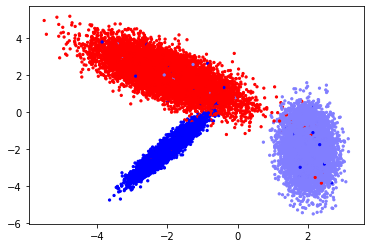

In [2]:
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

x,y = dt.make_classification(n_samples=30000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=2,
                                 n_redundant=0,
                                 n_classes=3,
                                 n_clusters_per_class=1,
                                 random_state=1000)

print(x)
print("**********")
print(y)

my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=5,
                                  cmap=color_map_discrete)

plt.show()

In [3]:
print(y)

[1 1 0 ... 1 2 2]


In [4]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
y.tolist().count(0)

10000

In [6]:
y.tolist().count(1)

9995

In [7]:
y.tolist().count(2)

10005

In [8]:
list0 = []
list1 = []
list2 = []

In [9]:
for a,b in zip(x,y):
    c = a.tolist()
    c.append(b)
    if b == 0:
        list0.append(c)
    elif b == 1:
        list1.append(c)
    else:
        list2.append(c)

In [16]:
list0

[[-2.781402340057654, 3.2763247329345484, 0],
 [-3.6635693746422167, 3.2980299454346094, 0],
 [-0.34284327510784585, 1.7603554261597267, 0],
 [-2.4404798406168586, 2.243048962036073, 0],
 [-1.4638964532293792, 1.1733565675942823, 0],
 [-0.562298215159956, 0.6859115784211893, 0],
 [-1.6917798707895686, 1.1409656692235588, 0],
 [-3.005048217434396, 2.3351617983801676, 0],
 [-2.064647398773239, 2.02178219170698, 0],
 [-3.467644384566353, 3.4433975560972274, 0],
 [-3.4036412069182775, 1.856991524236808, 0],
 [-0.9604784402714177, 1.3514720707220724, 0],
 [-0.5831300205417311, 1.0578141289500214, 0],
 [-1.99297737696532, 1.4882110874542787, 0],
 [-1.876332195013715, 1.4506613840320794, 0],
 [-3.0784934984725165, 1.6487259796539229, 0],
 [-2.2731941502887754, 0.662512806085398, 0],
 [-3.760555894002036, 4.256904006723507, 0],
 [-2.3255767997857135, 2.693237504318884, 0],
 [-2.0604308250633236, 2.2634229405372577, 0],
 [-1.1921481660602042, -0.7231357355741723, 0],
 [-2.0482172574209825, 1.51

In [42]:
client1 = []
client2 = []
client3 = []

l01 = math.ceil(len(list0)*0.7)
l02 = math.ceil(len(list0)*0.8)

l11 = math.ceil(len(list0)*0.6)
l12 = math.ceil(len(list0)*0.75)

l21 = math.ceil(len(list0)*0.65)
l22 = math.ceil(len(list0)*0.85)


client1 = list0[:l01] + list1[l11:l12] + list2[l22:]


client2 = list0[l02:] + list1[:l11] + list2[l21:l22]


client3 = list0[l01:l02] + list1[l12:] + list2[:l21]

In [46]:
len(client1)

10005

In [47]:
random.shuffle(client1)
random.shuffle(client2)
random.shuffle(client3)

# Test Data
    

[[ 2.25490393 -3.97860546]
 [-2.3830162   0.94678233]
 [-2.10772069  1.57657005]
 ...
 [ 2.05439967 -2.39141376]
 [-1.92860174  2.47566041]
 [-2.29657108 -1.89580499]]
**********
[1 0 0 0 2 2 2 1 1 0 0 2 2 1 2 1 1 1 1 1 1 2 1 2 1 2 2 0 1 1 1 2 2 2 0 2 0
 1 1 0 0 2 1 1 2 2 1 1 2 1 1 1 0 0 2 2 0 0 2 1 0 0 2 2 2 1 0 2 2 2 2 0 2 0
 2 1 2 0 1 1 1 1 0 0 0 1 2 0 0 2 2 2 0 0 1 0 1 0 2 2 0 2 1 0 1 1 1 1 1 0 1
 0 1 2 0 0 0 2 2 0 0 2 0 1 0 0 2 2 1 2 1 1 0 1 0 2 0 2 2 0 0 0 2 2 0 1 2 0
 1 0 2 1 1 0 0 1 2 0 0 2 2 2 0 1 2 0 2 1 2 1 2 1 0 1 1 1 0 0 1 0 2 1 0 2 1
 2 2 0 1 0 2 0 0 1 2 0 0 2 0 0 0 1 1 1 0 0 2 0 2 2 0 2 0 2 1 2 2 0 2 0 0 1
 1 0 0 2 2 1 1 0 0 1 0 0 2 1 2 0 0 1 0 1 1 1 2 0 0 2 1 0 2 1 0 2 0 1 0 0 1
 1 1 0 1 2 2 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 2 2 2 0 2 0 0 0 0 1 2 0 0 1 2 1
 1 0 0 1 0 1 0 0 0 2 1 2 0 1 1 2 1 2 2 0 1 2 2 2 0 0 1 2 2 2 2 0 0 2 0 0 2
 1 1 1 0 1 1 2 0 0 0 2 1 2 1 2 0 1 2 0 0 2 1 1 1 0 1 2 0 1 0 1 2 2 1 0 2 2
 1 2 1 1 0 1 0 2 2 1 0 0 2 1 0 0 2 2 1 2 0 2 1 2 0 2 1 1 2 1 1 2 2 1 1 

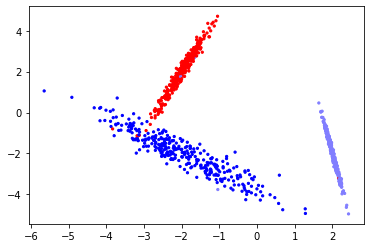

In [64]:
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

x,y = dt.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=2,
                                 n_redundant=0,
                                 n_classes=3,
                                 n_clusters_per_class=1,
                                 random_state=1000)

print(x)
print("**********")
print(y)

my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=5,
                                  cmap=color_map_discrete)

plt.show()